In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
import time


Using TensorFlow backend.


In [2]:
def DataProcessing(data, prev_per, forw_per,jump=1):
    X,Y = [],[]
    data_X=data[:,:-1]
    data_Y=data[:,-1]
    for i in range(0,len(data) -prev_per -forw_per +1, jump):
        X.append(data_X[i:(i+prev_per)])
        Y.append(data_Y[(i+prev_per):(i+prev_per+forw_per)])
    return np.array(X),np.array(Y)

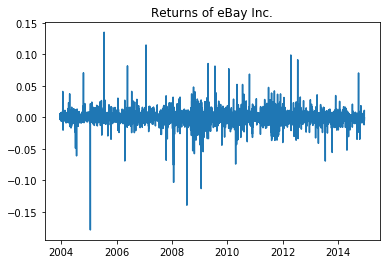

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1647 samples, validate on 412 samples
Epoch 1/25
1647/1647 [==============================] - 2s 2ms/step - loss: 4.0392e-04 - val_loss: 7.6203e-05
Epoch 2/25
1647/1647 [==============================] - 0s 48us/step - loss: 1.7439e-04 - val_loss: 1.0734e-04
Epoch 3/25
1647/1647 [==============================] - 0s 44us/step - loss: 1.7162e-04 - val_loss: 8.0133e-05
Epoch 4/25
1647/1647 [==============================] - 0s 44us/step - loss: 1.6727e-04 - val_loss: 7.6861e-05
Epoch 5/25
1647/1647 [==============================] - 0s 43us/step - loss: 1.6646e-04 - val_loss: 8.0830e-05
Epoch 6/25
1647/1647 [==============================] - 0s 43us/step - loss: 1.6655e-04 - val_loss: 7.8784e-05
Epoch 7/25
1647/1647 [==============================] - 0s 43us/step - loss: 1.6635e-04 - val_loss: 7.9968e-05
Epoch 8/25
1647/1647 [==============================] - 0

Epoch 18/25
1647/1647 [==============================] - 0s 47us/step - loss: 1.4084e-04 - val_loss: 6.6187e-05
Epoch 19/25
1647/1647 [==============================] - 0s 55us/step - loss: 1.3806e-04 - val_loss: 6.5323e-05
Epoch 20/25
1647/1647 [==============================] - 0s 48us/step - loss: 1.3444e-04 - val_loss: 6.5520e-05
Epoch 21/25
1647/1647 [==============================] - 0s 49us/step - loss: 1.3155e-04 - val_loss: 6.5193e-05
Epoch 22/25
1647/1647 [==============================] - 0s 47us/step - loss: 1.2871e-04 - val_loss: 6.2779e-05
Epoch 23/25
1647/1647 [==============================] - 0s 47us/step - loss: 1.2629e-04 - val_loss: 6.1874e-05
Epoch 24/25
1647/1647 [==============================] - 0s 49us/step - loss: 1.2416e-04 - val_loss: 6.0924e-05
Epoch 25/25
1647/1647 [==============================] - 0s 49us/step - loss: 1.2286e-04 - val_loss: 5.9115e-05
Train on 1647 samples, validate on 412 samples
Epoch 1/25
1647/1647 [==============================] - 3

1647/1647 [==============================] - 0s 55us/step - loss: 1.5888e-04 - val_loss: 7.4486e-05
Epoch 13/25
1647/1647 [==============================] - 0s 55us/step - loss: 1.5766e-04 - val_loss: 7.2935e-05
Epoch 14/25
1647/1647 [==============================] - 0s 55us/step - loss: 1.5521e-04 - val_loss: 7.4542e-05
Epoch 15/25
1647/1647 [==============================] - 0s 55us/step - loss: 1.5357e-04 - val_loss: 7.4173e-05
Epoch 16/25
1647/1647 [==============================] - 0s 55us/step - loss: 1.5241e-04 - val_loss: 7.2396e-05
Epoch 17/25
1647/1647 [==============================] - 0s 53us/step - loss: 1.5026e-04 - val_loss: 6.9774e-05
Epoch 18/25
1647/1647 [==============================] - 0s 53us/step - loss: 1.4855e-04 - val_loss: 7.1391e-05
Epoch 19/25
1647/1647 [==============================] - 0s 56us/step - loss: 1.4643e-04 - val_loss: 7.6711e-05
Epoch 20/25
1647/1647 [==============================] - 0s 53us/step - loss: 1.4499e-04 - val_loss: 6.7977e-05
Epoc

1647/1647 [==============================] - 0s 60us/step - loss: 1.5998e-04 - val_loss: 7.6237e-05
Epoch 6/25
1647/1647 [==============================] - 0s 61us/step - loss: 1.5761e-04 - val_loss: 7.5536e-05
Epoch 7/25
1647/1647 [==============================] - 0s 61us/step - loss: 1.5489e-04 - val_loss: 7.6802e-05
Epoch 8/25
1647/1647 [==============================] - 0s 60us/step - loss: 1.5178e-04 - val_loss: 7.0688e-05
Epoch 9/25
1647/1647 [==============================] - 0s 61us/step - loss: 1.4766e-04 - val_loss: 7.3206e-05
Epoch 10/25
1647/1647 [==============================] - 0s 59us/step - loss: 1.4341e-04 - val_loss: 7.4330e-05
Epoch 11/25
1647/1647 [==============================] - 0s 61us/step - loss: 1.3942e-04 - val_loss: 6.9095e-05
Epoch 12/25
1647/1647 [==============================] - 0s 59us/step - loss: 1.3440e-04 - val_loss: 6.4007e-05
Epoch 13/25
1647/1647 [==============================] - 0s 60us/step - loss: 1.3003e-04 - val_loss: 6.9301e-05
Epoch 14

1646/1646 [==============================] - 0s 81us/step - loss: 1.2284e-04 - val_loss: 5.9786e-05
Epoch 25/25
1646/1646 [==============================] - 0s 83us/step - loss: 1.2285e-04 - val_loss: 6.0501e-05
Train on 1646 samples, validate on 412 samples
Epoch 1/25
1646/1646 [==============================] - 9s 5ms/step - loss: 4.0050e-04 - val_loss: 7.8688e-05
Epoch 2/25
1646/1646 [==============================] - 0s 90us/step - loss: 1.7193e-04 - val_loss: 1.0552e-04
Epoch 3/25
1646/1646 [==============================] - 0s 103us/step - loss: 1.7156e-04 - val_loss: 8.0644e-05
Epoch 4/25
1646/1646 [==============================] - 0s 86us/step - loss: 1.6600e-04 - val_loss: 7.5914e-05
Epoch 5/25
1646/1646 [==============================] - 0s 83us/step - loss: 1.6586e-04 - val_loss: 7.8970e-05
Epoch 6/25
1646/1646 [==============================] - 0s 81us/step - loss: 1.6549e-04 - val_loss: 7.8681e-05
Epoch 7/25
1646/1646 [==============================] - 0s 79us/step - loss

1646/1646 [==============================] - 0s 84us/step - loss: 1.2435e-04 - val_loss: 5.9601e-05
Epoch 22/25
1646/1646 [==============================] - 0s 91us/step - loss: 1.2172e-04 - val_loss: 5.9136e-05
Epoch 23/25
1646/1646 [==============================] - 0s 89us/step - loss: 1.2253e-04 - val_loss: 6.0243e-05
Epoch 24/25
1646/1646 [==============================] - 0s 88us/step - loss: 1.2216e-04 - val_loss: 5.9803e-05
Epoch 25/25
1646/1646 [==============================] - 0s 94us/step - loss: 1.2135e-04 - val_loss: 5.9270e-05
Train on 1646 samples, validate on 412 samples
Epoch 1/25
1646/1646 [==============================] - 9s 5ms/step - loss: 2.8061e-04 - val_loss: 1.2297e-04
Epoch 2/25
1646/1646 [==============================] - 0s 85us/step - loss: 1.7413e-04 - val_loss: 7.4587e-05
Epoch 3/25
1646/1646 [==============================] - 0s 84us/step - loss: 1.6401e-04 - val_loss: 7.5013e-05
Epoch 4/25
1646/1646 [==============================] - 0s 83us/step - lo

1646/1646 [==============================] - 0s 99us/step - loss: 1.3936e-04 - val_loss: 6.8307e-05
Epoch 16/25
1646/1646 [==============================] - 0s 98us/step - loss: 1.3722e-04 - val_loss: 7.0664e-05
Epoch 17/25
1646/1646 [==============================] - 0s 98us/step - loss: 1.3467e-04 - val_loss: 6.2775e-05
Epoch 18/25
1646/1646 [==============================] - 0s 107us/step - loss: 1.3125e-04 - val_loss: 6.2412e-05
Epoch 19/25
1646/1646 [==============================] - 0s 92us/step - loss: 1.3038e-04 - val_loss: 6.1662e-05
Epoch 20/25
1646/1646 [==============================] - 0s 94us/step - loss: 1.2701e-04 - val_loss: 6.0484e-05
Epoch 21/25
1646/1646 [==============================] - 0s 95us/step - loss: 1.2572e-04 - val_loss: 5.9970e-05
Epoch 22/25
1646/1646 [==============================] - 0s 89us/step - loss: 1.2453e-04 - val_loss: 6.0362e-05
Epoch 23/25
1646/1646 [==============================] - 0s 94us/step - loss: 1.2395e-04 - val_loss: 5.9568e-05
Epo

1646/1646 [==============================] - 0s 98us/step - loss: 1.2242e-04 - val_loss: 6.3505e-05
Epoch 13/25
1646/1646 [==============================] - 0s 98us/step - loss: 1.2296e-04 - val_loss: 6.2333e-05
Epoch 14/25
1646/1646 [==============================] - 0s 97us/step - loss: 1.2223e-04 - val_loss: 5.9936e-05
Epoch 15/25
1646/1646 [==============================] - 0s 98us/step - loss: 1.2143e-04 - val_loss: 5.9740e-05
Epoch 16/25
1646/1646 [==============================] - 0s 97us/step - loss: 1.2241e-04 - val_loss: 6.2314e-05
Epoch 17/25
1646/1646 [==============================] - 0s 108us/step - loss: 1.2249e-04 - val_loss: 6.3377e-05
Epoch 18/25
1646/1646 [==============================] - 0s 97us/step - loss: 1.2265e-04 - val_loss: 5.9259e-05
Epoch 19/25
1646/1646 [==============================] - 0s 97us/step - loss: 1.2184e-04 - val_loss: 6.1623e-05
Epoch 20/25
1646/1646 [==============================] - 0s 102us/step - loss: 1.2221e-04 - val_loss: 6.1923e-05
Ep

1645/1645 [==============================] - 0s 128us/step - loss: 1.6836e-04 - val_loss: 7.9295e-05
Epoch 5/25
1645/1645 [==============================] - 0s 138us/step - loss: 1.6491e-04 - val_loss: 7.7668e-05
Epoch 6/25
1645/1645 [==============================] - 0s 137us/step - loss: 1.6180e-04 - val_loss: 7.7161e-05
Epoch 7/25
1645/1645 [==============================] - 0s 143us/step - loss: 1.5862e-04 - val_loss: 7.5031e-05
Epoch 8/25
1645/1645 [==============================] - 0s 136us/step - loss: 1.5512e-04 - val_loss: 7.2788e-05
Epoch 9/25
1645/1645 [==============================] - 0s 137us/step - loss: 1.5176e-04 - val_loss: 7.8131e-05
Epoch 10/25
1645/1645 [==============================] - 0s 134us/step - loss: 1.4862e-04 - val_loss: 7.0037e-05
Epoch 11/25
1645/1645 [==============================] - 0s 130us/step - loss: 1.4425e-04 - val_loss: 7.6189e-05
Epoch 12/25
1645/1645 [==============================] - 0s 136us/step - loss: 1.4136e-04 - val_loss: 7.1885e-05


Train on 1645 samples, validate on 412 samples
Epoch 1/25
1645/1645 [==============================] - 19s 11ms/step - loss: 1.9270e-04 - val_loss: 7.5306e-05
Epoch 2/25
1645/1645 [==============================] - 0s 142us/step - loss: 1.4358e-04 - val_loss: 7.9277e-05
Epoch 3/25
1645/1645 [==============================] - 0s 133us/step - loss: 1.3325e-04 - val_loss: 6.3711e-05
Epoch 4/25
1645/1645 [==============================] - 0s 137us/step - loss: 1.3023e-04 - val_loss: 6.3123e-05
Epoch 5/25
1645/1645 [==============================] - 0s 134us/step - loss: 1.2848e-04 - val_loss: 6.1256e-05
Epoch 6/25
1645/1645 [==============================] - 0s 139us/step - loss: 1.2679e-04 - val_loss: 6.3470e-05
Epoch 7/25
1645/1645 [==============================] - 0s 134us/step - loss: 1.2555e-04 - val_loss: 6.2958e-05
Epoch 8/25
1645/1645 [==============================] - 0s 131us/step - loss: 1.2767e-04 - val_loss: 6.0699e-05
Epoch 9/25
1645/1645 [==============================] - 0

1645/1645 [==============================] - 0s 155us/step - loss: 1.2293e-04 - val_loss: 6.0110e-05
Epoch 19/25
1645/1645 [==============================] - 0s 162us/step - loss: 1.2347e-04 - val_loss: 6.6980e-05
Epoch 20/25
1645/1645 [==============================] - 0s 156us/step - loss: 1.2251e-04 - val_loss: 6.4561e-05
Epoch 21/25
1645/1645 [==============================] - 0s 171us/step - loss: 1.2537e-04 - val_loss: 6.3135e-05
Epoch 22/25
1645/1645 [==============================] - 0s 164us/step - loss: 1.2485e-04 - val_loss: 6.8534e-05
Epoch 23/25
1645/1645 [==============================] - 0s 165us/step - loss: 1.2370e-04 - val_loss: 6.0223e-05
Epoch 24/25
1645/1645 [==============================] - 0s 168us/step - loss: 1.2352e-04 - val_loss: 5.9711e-05
Epoch 25/25
1645/1645 [==============================] - 0s 163us/step - loss: 1.2229e-04 - val_loss: 6.3563e-05
Train on 1645 samples, validate on 412 samples
Epoch 1/25
1645/1645 [==============================] - 23s 1

1644/1644 [==============================] - 0s 169us/step - loss: 1.2719e-04 - val_loss: 6.1206e-05
Epoch 11/25
1644/1644 [==============================] - 0s 176us/step - loss: 1.2521e-04 - val_loss: 6.5105e-05
Epoch 12/25
1644/1644 [==============================] - 0s 188us/step - loss: 1.2851e-04 - val_loss: 6.0270e-05
Epoch 13/25
1644/1644 [==============================] - 0s 203us/step - loss: 1.2423e-04 - val_loss: 6.0735e-05
Epoch 14/25
1644/1644 [==============================] - 0s 185us/step - loss: 1.2584e-04 - val_loss: 5.9507e-05
Epoch 15/25
1644/1644 [==============================] - 0s 189us/step - loss: 1.2278e-04 - val_loss: 5.9396e-05
Epoch 16/25
1644/1644 [==============================] - 0s 195us/step - loss: 1.2353e-04 - val_loss: 5.9704e-05
Epoch 17/25
1644/1644 [==============================] - 0s 175us/step - loss: 1.2280e-04 - val_loss: 5.9529e-05
Epoch 18/25
1644/1644 [==============================] - 0s 183us/step - loss: 1.2245e-04 - val_loss: 6.1122

1644/1644 [==============================] - 0s 207us/step - loss: 1.6748e-04 - val_loss: 8.2633e-05
Epoch 3/25
1644/1644 [==============================] - 0s 214us/step - loss: 1.6079e-04 - val_loss: 6.9935e-05
Epoch 4/25
1644/1644 [==============================] - 0s 206us/step - loss: 1.5562e-04 - val_loss: 6.9002e-05
Epoch 5/25
1644/1644 [==============================] - 0s 208us/step - loss: 1.5175e-04 - val_loss: 7.7477e-05
Epoch 6/25
1644/1644 [==============================] - 0s 214us/step - loss: 1.4520e-04 - val_loss: 6.8498e-05
Epoch 7/25
1644/1644 [==============================] - 0s 208us/step - loss: 1.4223e-04 - val_loss: 6.6247e-05
Epoch 8/25
1644/1644 [==============================] - 0s 212us/step - loss: 1.3696e-04 - val_loss: 6.9818e-05
Epoch 9/25
1644/1644 [==============================] - 0s 216us/step - loss: 1.3388e-04 - val_loss: 6.5759e-05
Epoch 10/25
1644/1644 [==============================] - 0s 206us/step - loss: 1.3219e-04 - val_loss: 7.4830e-05
Ep

Epoch 24/25
1644/1644 [==============================] - 0s 217us/step - loss: 1.2446e-04 - val_loss: 6.0230e-05
Epoch 25/25
1644/1644 [==============================] - 0s 220us/step - loss: 1.2333e-04 - val_loss: 6.1532e-05
Train on 1644 samples, validate on 412 samples
Epoch 1/25
1644/1644 [==============================] - 35s 21ms/step - loss: 3.0258e-04 - val_loss: 1.4140e-04
Epoch 2/25
1644/1644 [==============================] - 0s 246us/step - loss: 1.6946e-04 - val_loss: 7.1551e-05
Epoch 3/25
1644/1644 [==============================] - 0s 223us/step - loss: 1.6300e-04 - val_loss: 7.7503e-05
Epoch 4/25
1644/1644 [==============================] - 0s 221us/step - loss: 1.5707e-04 - val_loss: 7.6151e-05
Epoch 5/25
1644/1644 [==============================] - 0s 231us/step - loss: 1.5356e-04 - val_loss: 6.8993e-05
Epoch 6/25
1644/1644 [==============================] - 0s 226us/step - loss: 1.4936e-04 - val_loss: 7.6180e-05
Epoch 7/25
1644/1644 [==============================] -

1644/1644 [==============================] - 0s 237us/step - loss: 1.3101e-04 - val_loss: 6.2780e-05
Epoch 17/25
1644/1644 [==============================] - 0s 232us/step - loss: 1.2903e-04 - val_loss: 6.0101e-05
Epoch 18/25
1644/1644 [==============================] - 0s 229us/step - loss: 1.2677e-04 - val_loss: 6.3928e-05
Epoch 19/25
1644/1644 [==============================] - 0s 226us/step - loss: 1.2580e-04 - val_loss: 6.0485e-05
Epoch 20/25
1644/1644 [==============================] - 0s 230us/step - loss: 1.2587e-04 - val_loss: 6.0595e-05
Epoch 21/25
1644/1644 [==============================] - 0s 223us/step - loss: 1.2500e-04 - val_loss: 6.2318e-05
Epoch 22/25
1644/1644 [==============================] - 0s 227us/step - loss: 1.2508e-04 - val_loss: 6.2103e-05
Epoch 23/25
1644/1644 [==============================] - 1s 319us/step - loss: 1.2580e-04 - val_loss: 6.0689e-05
Epoch 24/25
1644/1644 [==============================] - 0s 263us/step - loss: 1.2658e-04 - val_loss: 5.9942

1644/1644 [==============================] - 0s 266us/step - loss: 1.2996e-04 - val_loss: 6.0056e-05
Epoch 9/25
1644/1644 [==============================] - 0s 258us/step - loss: 1.2818e-04 - val_loss: 5.9914e-05
Epoch 10/25
1644/1644 [==============================] - 0s 249us/step - loss: 1.2608e-04 - val_loss: 6.0276e-05
Epoch 11/25
1644/1644 [==============================] - 0s 248us/step - loss: 1.2636e-04 - val_loss: 6.0735e-05
Epoch 12/25
1644/1644 [==============================] - 0s 246us/step - loss: 1.2597e-04 - val_loss: 7.0257e-05
Epoch 13/25
1644/1644 [==============================] - 0s 246us/step - loss: 1.2661e-04 - val_loss: 6.4488e-05
Epoch 14/25
1644/1644 [==============================] - 0s 243us/step - loss: 1.2600e-04 - val_loss: 5.9585e-05
Epoch 15/25
1644/1644 [==============================] - 0s 246us/step - loss: 1.2714e-04 - val_loss: 6.5430e-05
Epoch 16/25
1644/1644 [==============================] - 0s 244us/step - loss: 1.2471e-04 - val_loss: 5.9354e

Train on 1644 samples, validate on 411 samples
Epoch 1/25
1644/1644 [==============================] - 49s 30ms/step - loss: 2.6601e-04 - val_loss: 8.2908e-05
Epoch 2/25
1644/1644 [==============================] - 1s 308us/step - loss: 1.6183e-04 - val_loss: 6.9723e-05
Epoch 3/25
1644/1644 [==============================] - 1s 306us/step - loss: 1.4668e-04 - val_loss: 8.1521e-05
Epoch 4/25
1644/1644 [==============================] - 0s 303us/step - loss: 1.4198e-04 - val_loss: 7.6602e-05
Epoch 5/25
1644/1644 [==============================] - 1s 317us/step - loss: 1.3356e-04 - val_loss: 6.3657e-05
Epoch 6/25
1644/1644 [==============================] - 1s 325us/step - loss: 1.2878e-04 - val_loss: 5.9554e-05
Epoch 7/25
1644/1644 [==============================] - 0s 285us/step - loss: 1.2693e-04 - val_loss: 6.3901e-05
Epoch 8/25
1644/1644 [==============================] - 0s 287us/step - loss: 1.2550e-04 - val_loss: 6.7712e-05
Epoch 9/25
1644/1644 [==============================] - 0

1640/1640 [==============================] - 1s 409us/step - loss: 1.2440e-04 - val_loss: 6.0118e-05
Epoch 19/25
1640/1640 [==============================] - 1s 414us/step - loss: 1.2533e-04 - val_loss: 6.1123e-05
Epoch 20/25
1640/1640 [==============================] - 1s 421us/step - loss: 1.2774e-04 - val_loss: 5.7838e-05
Epoch 21/25
1640/1640 [==============================] - 1s 421us/step - loss: 1.2476e-04 - val_loss: 5.8084e-05
Epoch 22/25
1640/1640 [==============================] - 1s 422us/step - loss: 1.2616e-04 - val_loss: 7.2656e-05
Epoch 23/25
1640/1640 [==============================] - 1s 431us/step - loss: 1.2862e-04 - val_loss: 5.9181e-05
Epoch 24/25
1640/1640 [==============================] - 1s 428us/step - loss: 1.2453e-04 - val_loss: 6.6694e-05
Epoch 25/25
1640/1640 [==============================] - 1s 444us/step - loss: 1.2574e-04 - val_loss: 5.8457e-05
Train on 1640 samples, validate on 410 samples
Epoch 1/25
1640/1640 [==============================] - 53s 3

1640/1640 [==============================] - 1s 435us/step - loss: 1.3597e-04 - val_loss: 6.1912e-05
Epoch 11/25
1640/1640 [==============================] - 1s 435us/step - loss: 1.3208e-04 - val_loss: 6.3063e-05
Epoch 12/25
1640/1640 [==============================] - 1s 443us/step - loss: 1.3019e-04 - val_loss: 6.2747e-05
Epoch 13/25
1640/1640 [==============================] - 1s 453us/step - loss: 1.2884e-04 - val_loss: 6.5984e-05
Epoch 14/25
1640/1640 [==============================] - 1s 482us/step - loss: 1.2676e-04 - val_loss: 6.1259e-05
Epoch 15/25
1640/1640 [==============================] - 1s 526us/step - loss: 1.2683e-04 - val_loss: 6.1003e-05
Epoch 16/25
1640/1640 [==============================] - 1s 465us/step - loss: 1.2799e-04 - val_loss: 5.9302e-05
Epoch 17/25
1640/1640 [==============================] - 1s 423us/step - loss: 1.3100e-04 - val_loss: 6.1196e-05
Epoch 18/25
1640/1640 [==============================] - 1s 403us/step - loss: 1.2887e-04 - val_loss: 6.3849

1640/1640 [==============================] - 1s 604us/step - loss: 1.7632e-04 - val_loss: 7.1433e-05
Epoch 3/25
1640/1640 [==============================] - 1s 570us/step - loss: 1.5277e-04 - val_loss: 6.3550e-05
Epoch 4/25
1640/1640 [==============================] - 1s 580us/step - loss: 1.3858e-04 - val_loss: 6.4536e-05
Epoch 5/25
1640/1640 [==============================] - 1s 590us/step - loss: 1.3118e-04 - val_loss: 5.9988e-05
Epoch 6/25
1640/1640 [==============================] - 1s 535us/step - loss: 1.2574e-04 - val_loss: 5.8306e-05
Epoch 7/25
1640/1640 [==============================] - 1s 514us/step - loss: 1.2453e-04 - val_loss: 5.8358e-05
Epoch 8/25
1640/1640 [==============================] - 1s 534us/step - loss: 1.2849e-04 - val_loss: 5.8019e-05
Epoch 9/25
1640/1640 [==============================] - 1s 572us/step - loss: 1.2460e-04 - val_loss: 6.8575e-05
Epoch 10/25
1640/1640 [==============================] - 1s 552us/step - loss: 1.2710e-04 - val_loss: 6.4892e-05
Ep

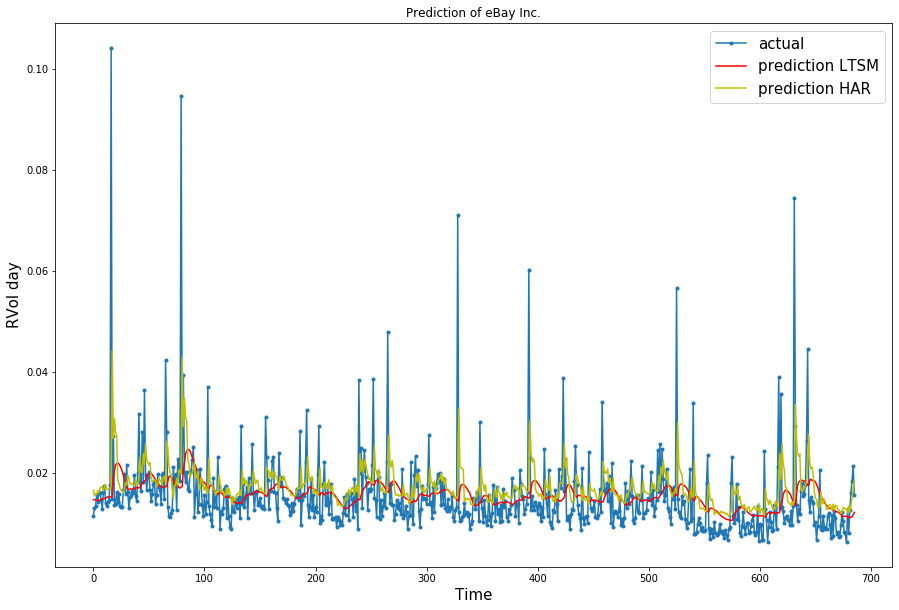

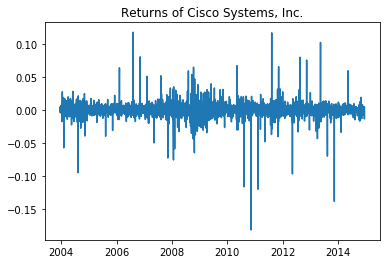

Train on 1647 samples, validate on 412 samples
Epoch 1/25
1647/1647 [==============================] - 69s 42ms/step - loss: 2.3155e-04 - val_loss: 1.9291e-04
Epoch 2/25
1647/1647 [==============================] - 0s 244us/step - loss: 1.2480e-04 - val_loss: 2.0754e-04
Epoch 3/25
1647/1647 [==============================] - 0s 239us/step - loss: 1.1408e-04 - val_loss: 1.8770e-04
Epoch 4/25
1647/1647 [==============================] - 0s 253us/step - loss: 1.1289e-04 - val_loss: 1.9130e-04
Epoch 5/25
1647/1647 [==============================] - 0s 221us/step - loss: 1.1206e-04 - val_loss: 1.9040e-04
Epoch 6/25
1647/1647 [==============================] - 0s 227us/step - loss: 1.1150e-04 - val_loss: 1.9136e-04
Epoch 7/25
1647/1647 [==============================] - 0s 239us/step - loss: 1.1136e-04 - val_loss: 1.9032e-04
Epoch 8/25
1647/1647 [==============================] - 0s 238us/step - loss: 1.1058e-04 - val_loss: 1.9034e-04
Epoch 9/25
1647/1647 [==============================] - 0

1647/1647 [==============================] - 0s 237us/step - loss: 7.8987e-05 - val_loss: 1.8806e-04
Epoch 19/25
1647/1647 [==============================] - 0s 239us/step - loss: 7.5262e-05 - val_loss: 1.8651e-04
Epoch 20/25
1647/1647 [==============================] - 0s 212us/step - loss: 7.2428e-05 - val_loss: 1.8834e-04
Epoch 21/25
1647/1647 [==============================] - 0s 213us/step - loss: 6.9624e-05 - val_loss: 1.8754e-04
Epoch 22/25
1647/1647 [==============================] - 0s 223us/step - loss: 6.8398e-05 - val_loss: 1.9018e-04
Epoch 23/25
1647/1647 [==============================] - 0s 241us/step - loss: 6.8064e-05 - val_loss: 1.9071e-04
Epoch 24/25
1647/1647 [==============================] - 0s 218us/step - loss: 6.4983e-05 - val_loss: 1.9191e-04
Epoch 25/25
1647/1647 [==============================] - 0s 240us/step - loss: 6.5147e-05 - val_loss: 1.9467e-04
Train on 1647 samples, validate on 412 samples
Epoch 1/25
1647/1647 [==============================] - 75s 4

1647/1647 [==============================] - 0s 230us/step - loss: 9.6168e-05 - val_loss: 1.8473e-04
Epoch 11/25
1647/1647 [==============================] - 0s 228us/step - loss: 9.0666e-05 - val_loss: 1.8578e-04
Epoch 12/25
1647/1647 [==============================] - 0s 250us/step - loss: 8.4028e-05 - val_loss: 1.8885e-04
Epoch 13/25
1647/1647 [==============================] - 0s 230us/step - loss: 7.8392e-05 - val_loss: 1.8767e-04
Epoch 14/25
1647/1647 [==============================] - 0s 214us/step - loss: 7.2898e-05 - val_loss: 1.9082e-04
Epoch 15/25
1647/1647 [==============================] - 0s 246us/step - loss: 6.8297e-05 - val_loss: 1.9397e-04
Epoch 16/25
1647/1647 [==============================] - 0s 231us/step - loss: 6.8059e-05 - val_loss: 2.0021e-04
Epoch 17/25
1647/1647 [==============================] - 0s 248us/step - loss: 6.6626e-05 - val_loss: 2.0009e-04
Epoch 18/25
1647/1647 [==============================] - 0s 257us/step - loss: 6.5056e-05 - val_loss: 2.0198

1646/1646 [==============================] - 0s 295us/step - loss: 1.3014e-04 - val_loss: 1.8872e-04
Epoch 3/25
1646/1646 [==============================] - 0s 293us/step - loss: 1.1698e-04 - val_loss: 1.9219e-04
Epoch 4/25
1646/1646 [==============================] - 0s 289us/step - loss: 1.1517e-04 - val_loss: 1.9036e-04
Epoch 5/25
1646/1646 [==============================] - 0s 270us/step - loss: 1.1336e-04 - val_loss: 1.9153e-04
Epoch 6/25
1646/1646 [==============================] - 0s 283us/step - loss: 1.1260e-04 - val_loss: 1.8953e-04
Epoch 7/25
1646/1646 [==============================] - 1s 310us/step - loss: 1.1144e-04 - val_loss: 1.8900e-04
Epoch 8/25
1646/1646 [==============================] - 1s 309us/step - loss: 1.1015e-04 - val_loss: 1.8958e-04
Epoch 9/25
1646/1646 [==============================] - 0s 285us/step - loss: 1.0826e-04 - val_loss: 1.8868e-04
Epoch 10/25
1646/1646 [==============================] - 1s 310us/step - loss: 1.0650e-04 - val_loss: 1.8865e-04
Ep

Epoch 24/25
1646/1646 [==============================] - 1s 320us/step - loss: 6.7683e-05 - val_loss: 1.9580e-04
Epoch 25/25
1646/1646 [==============================] - 0s 298us/step - loss: 6.6017e-05 - val_loss: 1.9592e-04
Train on 1646 samples, validate on 412 samples
Epoch 1/25
1646/1646 [==============================] - 93s 56ms/step - loss: 2.2500e-04 - val_loss: 2.0296e-04
Epoch 2/25
1646/1646 [==============================] - 0s 290us/step - loss: 1.2323e-04 - val_loss: 1.9700e-04
Epoch 3/25
1646/1646 [==============================] - 0s 284us/step - loss: 1.1237e-04 - val_loss: 1.8745e-04
Epoch 4/25
1646/1646 [==============================] - 0s 274us/step - loss: 1.1190e-04 - val_loss: 1.9294e-04
Epoch 5/25
1646/1646 [==============================] - 1s 311us/step - loss: 1.1050e-04 - val_loss: 1.8949e-04
Epoch 6/25
1646/1646 [==============================] - 0s 302us/step - loss: 1.0930e-04 - val_loss: 1.9046e-04
Epoch 7/25
1646/1646 [==============================] -

1646/1646 [==============================] - 0s 294us/step - loss: 6.7492e-05 - val_loss: 1.9412e-04
Epoch 17/25
1646/1646 [==============================] - 0s 300us/step - loss: 6.6210e-05 - val_loss: 1.9913e-04
Epoch 18/25
1646/1646 [==============================] - 0s 301us/step - loss: 6.7670e-05 - val_loss: 1.9451e-04
Epoch 19/25
1646/1646 [==============================] - 1s 319us/step - loss: 6.5834e-05 - val_loss: 1.9484e-04
Epoch 20/25
1646/1646 [==============================] - 1s 349us/step - loss: 6.6262e-05 - val_loss: 1.9527e-04
Epoch 21/25
1646/1646 [==============================] - 1s 348us/step - loss: 6.6165e-05 - val_loss: 1.9536e-04
Epoch 22/25
1646/1646 [==============================] - 1s 340us/step - loss: 6.5312e-05 - val_loss: 1.9617e-04
Epoch 23/25
1646/1646 [==============================] - 1s 349us/step - loss: 6.5679e-05 - val_loss: 1.9523e-04
Epoch 24/25
1646/1646 [==============================] - 1s 346us/step - loss: 6.5425e-05 - val_loss: 1.9571

1646/1646 [==============================] - 0s 261us/step - loss: 7.6027e-05 - val_loss: 1.8704e-04
Epoch 9/25
1646/1646 [==============================] - 0s 261us/step - loss: 6.9631e-05 - val_loss: 1.8874e-04
Epoch 10/25
1646/1646 [==============================] - 0s 263us/step - loss: 6.7347e-05 - val_loss: 1.9373e-04
Epoch 11/25
1646/1646 [==============================] - 0s 268us/step - loss: 6.5960e-05 - val_loss: 1.9609e-04
Epoch 12/25
1646/1646 [==============================] - 0s 286us/step - loss: 6.7199e-05 - val_loss: 1.9641e-04
Epoch 13/25
1646/1646 [==============================] - 0s 273us/step - loss: 6.7435e-05 - val_loss: 1.9390e-04
Epoch 14/25
1646/1646 [==============================] - 0s 263us/step - loss: 6.6223e-05 - val_loss: 1.9457e-04
Epoch 15/25
1646/1646 [==============================] - 0s 264us/step - loss: 6.5888e-05 - val_loss: 1.9516e-04
Epoch 16/25
1646/1646 [==============================] - 0s 263us/step - loss: 6.6783e-05 - val_loss: 1.9564e

Train on 1645 samples, validate on 412 samples
Epoch 1/25
1645/1645 [==============================] - 124s 75ms/step - loss: 2.0999e-04 - val_loss: 2.2333e-04
Epoch 2/25
1645/1645 [==============================] - 1s 347us/step - loss: 1.2373e-04 - val_loss: 1.8996e-04
Epoch 3/25
1645/1645 [==============================] - 1s 343us/step - loss: 1.1718e-04 - val_loss: 1.8777e-04
Epoch 4/25
1645/1645 [==============================] - 1s 345us/step - loss: 1.1359e-04 - val_loss: 1.9679e-04
Epoch 5/25
1645/1645 [==============================] - 1s 347us/step - loss: 1.0984e-04 - val_loss: 1.8899e-04
Epoch 6/25
1645/1645 [==============================] - 1s 355us/step - loss: 1.0554e-04 - val_loss: 1.9164e-04
Epoch 7/25
1645/1645 [==============================] - 1s 353us/step - loss: 1.0156e-04 - val_loss: 1.8602e-04
Epoch 8/25
1645/1645 [==============================] - 1s 343us/step - loss: 9.7160e-05 - val_loss: 1.8702e-04
Epoch 9/25
1645/1645 [==============================] - 

1645/1645 [==============================] - 1s 493us/step - loss: 6.6180e-05 - val_loss: 1.9243e-04
Epoch 19/25
1645/1645 [==============================] - 1s 502us/step - loss: 6.7260e-05 - val_loss: 1.9144e-04
Epoch 20/25
1645/1645 [==============================] - 1s 496us/step - loss: 6.7468e-05 - val_loss: 1.9126e-04
Epoch 21/25
1645/1645 [==============================] - 1s 487us/step - loss: 6.9501e-05 - val_loss: 1.9021e-04
Epoch 22/25
1645/1645 [==============================] - 1s 480us/step - loss: 6.9618e-05 - val_loss: 1.9105e-04
Epoch 23/25
1645/1645 [==============================] - 1s 486us/step - loss: 6.6624e-05 - val_loss: 1.9188e-04
Epoch 24/25
1645/1645 [==============================] - 1s 482us/step - loss: 6.6186e-05 - val_loss: 1.9146e-04
Epoch 25/25
1645/1645 [==============================] - 1s 491us/step - loss: 6.6332e-05 - val_loss: 1.9203e-04
Train on 1645 samples, validate on 412 samples
Epoch 1/25
1645/1645 [==============================] - 133s 

1644/1644 [==============================] - 1s 557us/step - loss: 1.2594e-04 - val_loss: 1.9385e-04
Epoch 11/25
1644/1644 [==============================] - 1s 538us/step - loss: 1.2321e-04 - val_loss: 1.9801e-04
Epoch 12/25
1644/1644 [==============================] - 1s 557us/step - loss: 1.2087e-04 - val_loss: 1.9164e-04
Epoch 13/25
1644/1644 [==============================] - 1s 567us/step - loss: 1.1790e-04 - val_loss: 1.9242e-04
Epoch 14/25
1644/1644 [==============================] - 1s 553us/step - loss: 1.1497e-04 - val_loss: 1.9191e-04
Epoch 15/25
1644/1644 [==============================] - 1s 566us/step - loss: 1.1233e-04 - val_loss: 1.9017e-04
Epoch 16/25
1644/1644 [==============================] - 1s 562us/step - loss: 1.0980e-04 - val_loss: 1.8793e-04
Epoch 17/25
1644/1644 [==============================] - 1s 564us/step - loss: 1.0746e-04 - val_loss: 1.8956e-04
Epoch 18/25
1644/1644 [==============================] - 1s 544us/step - loss: 1.0438e-04 - val_loss: 1.8838

1644/1644 [==============================] - 1s 512us/step - loss: 1.0497e-04 - val_loss: 2.0665e-04
Epoch 3/25
1644/1644 [==============================] - 1s 572us/step - loss: 9.7447e-05 - val_loss: 1.8677e-04
Epoch 4/25
1644/1644 [==============================] - 1s 548us/step - loss: 8.8883e-05 - val_loss: 1.8928e-04
Epoch 5/25
1644/1644 [==============================] - 1s 653us/step - loss: 8.3610e-05 - val_loss: 1.8740e-04
Epoch 6/25
1644/1644 [==============================] - 1s 685us/step - loss: 7.8035e-05 - val_loss: 1.8679e-04
Epoch 7/25
1644/1644 [==============================] - 1s 677us/step - loss: 7.3263e-05 - val_loss: 1.8562e-04
Epoch 8/25
1644/1644 [==============================] - 1s 735us/step - loss: 6.9649e-05 - val_loss: 1.8756e-04
Epoch 9/25
1644/1644 [==============================] - 1s 686us/step - loss: 6.8971e-05 - val_loss: 1.9086e-04
Epoch 10/25
1644/1644 [==============================] - 1s 583us/step - loss: 6.7687e-05 - val_loss: 1.9066e-04
Ep

Epoch 24/25
1644/1644 [==============================] - 1s 466us/step - loss: 6.7105e-05 - val_loss: 1.9523e-04
Epoch 25/25
1644/1644 [==============================] - 1s 461us/step - loss: 6.6939e-05 - val_loss: 1.9189e-04
Train on 1644 samples, validate on 412 samples
Epoch 1/25
1644/1644 [==============================] - 154s 94ms/step - loss: 1.8920e-04 - val_loss: 2.0538e-04
Epoch 2/25
1644/1644 [==============================] - 1s 593us/step - loss: 1.1328e-04 - val_loss: 1.9071e-04
Epoch 3/25
1644/1644 [==============================] - 1s 627us/step - loss: 1.0559e-04 - val_loss: 1.8561e-04
Epoch 4/25
1644/1644 [==============================] - 1s 587us/step - loss: 1.0005e-04 - val_loss: 1.8652e-04
Epoch 5/25
1644/1644 [==============================] - 1s 597us/step - loss: 9.4479e-05 - val_loss: 1.8626e-04
Epoch 6/25
1644/1644 [==============================] - 1s 608us/step - loss: 8.8128e-05 - val_loss: 1.8497e-04
Epoch 7/25
1644/1644 [==============================] 

1644/1644 [==============================] - 1s 649us/step - loss: 6.9093e-05 - val_loss: 1.9024e-04
Epoch 17/25
1644/1644 [==============================] - 1s 642us/step - loss: 6.6933e-05 - val_loss: 1.8952e-04
Epoch 18/25
1644/1644 [==============================] - 1s 646us/step - loss: 6.9027e-05 - val_loss: 1.8972e-04
Epoch 19/25
1644/1644 [==============================] - 1s 639us/step - loss: 6.6444e-05 - val_loss: 1.8928e-04
Epoch 20/25
1644/1644 [==============================] - 1s 647us/step - loss: 6.6226e-05 - val_loss: 1.8970e-04
Epoch 21/25
1644/1644 [==============================] - 1s 640us/step - loss: 6.6819e-05 - val_loss: 1.9008e-04
Epoch 22/25
1644/1644 [==============================] - 1s 636us/step - loss: 6.7018e-05 - val_loss: 1.8976e-04
Epoch 23/25
1644/1644 [==============================] - 1s 646us/step - loss: 6.7240e-05 - val_loss: 1.9180e-04
Epoch 24/25
1644/1644 [==============================] - 1s 640us/step - loss: 6.8481e-05 - val_loss: 1.8952

1644/1644 [==============================] - 1s 625us/step - loss: 6.9573e-05 - val_loss: 1.8992e-04
Epoch 9/25
1644/1644 [==============================] - 1s 638us/step - loss: 6.8620e-05 - val_loss: 1.9005e-04
Epoch 10/25
1644/1644 [==============================] - 1s 634us/step - loss: 6.8636e-05 - val_loss: 1.8900e-04
Epoch 11/25
1644/1644 [==============================] - 1s 635us/step - loss: 6.8056e-05 - val_loss: 1.8902e-04
Epoch 12/25
1644/1644 [==============================] - 1s 632us/step - loss: 6.8208e-05 - val_loss: 1.9740e-04
Epoch 13/25
1644/1644 [==============================] - 1s 642us/step - loss: 6.8714e-05 - val_loss: 1.8966e-04
Epoch 14/25
1644/1644 [==============================] - 1s 638us/step - loss: 6.8366e-05 - val_loss: 1.8999e-04
Epoch 15/25
1644/1644 [==============================] - 1s 635us/step - loss: 6.8745e-05 - val_loss: 1.9066e-04
Epoch 16/25
1644/1644 [==============================] - 1s 627us/step - loss: 6.7903e-05 - val_loss: 1.8959e

Train on 1644 samples, validate on 411 samples
Epoch 1/25
1644/1644 [==============================] - 193s 118ms/step - loss: 2.0349e-04 - val_loss: 2.0600e-04
Epoch 2/25
1644/1644 [==============================] - 1s 668us/step - loss: 1.2362e-04 - val_loss: 1.9078e-04
Epoch 3/25
1644/1644 [==============================] - 1s 658us/step - loss: 1.0181e-04 - val_loss: 1.8729e-04
Epoch 4/25
1644/1644 [==============================] - 1s 674us/step - loss: 8.8133e-05 - val_loss: 1.8580e-04
Epoch 5/25
1644/1644 [==============================] - 1s 659us/step - loss: 7.7120e-05 - val_loss: 1.8586e-04
Epoch 6/25
1644/1644 [==============================] - 1s 667us/step - loss: 6.9964e-05 - val_loss: 1.9513e-04
Epoch 7/25
1644/1644 [==============================] - 1s 660us/step - loss: 6.8493e-05 - val_loss: 1.9431e-04
Epoch 8/25
1644/1644 [==============================] - 1s 661us/step - loss: 6.8944e-05 - val_loss: 2.0286e-04
Epoch 9/25
1644/1644 [==============================] -

1644/1644 [==============================] - 1s 673us/step - loss: 7.0831e-05 - val_loss: 1.9558e-04
Epoch 19/25
1644/1644 [==============================] - 1s 670us/step - loss: 6.7719e-05 - val_loss: 1.9458e-04
Epoch 20/25
1644/1644 [==============================] - 1s 676us/step - loss: 6.7689e-05 - val_loss: 1.9010e-04
Epoch 21/25
1644/1644 [==============================] - 1s 668us/step - loss: 6.7566e-05 - val_loss: 1.9085e-04
Epoch 22/25
1644/1644 [==============================] - 1s 672us/step - loss: 6.6686e-05 - val_loss: 1.9297e-04
Epoch 23/25
1644/1644 [==============================] - 1s 667us/step - loss: 6.6710e-05 - val_loss: 1.9483e-04
Epoch 24/25
1644/1644 [==============================] - 1s 667us/step - loss: 6.7535e-05 - val_loss: 1.9049e-04
Epoch 25/25
1644/1644 [==============================] - 1s 676us/step - loss: 6.8511e-05 - val_loss: 1.9169e-04
Train on 1640 samples, validate on 410 samples
Epoch 1/25
1640/1640 [==============================] - 208s 

1640/1640 [==============================] - 1s 876us/step - loss: 7.1771e-05 - val_loss: 1.9119e-04
Epoch 11/25
1640/1640 [==============================] - 1s 870us/step - loss: 6.9684e-05 - val_loss: 1.8990e-04
Epoch 12/25
1640/1640 [==============================] - 1s 871us/step - loss: 6.9750e-05 - val_loss: 1.9190e-04
Epoch 13/25
1640/1640 [==============================] - 1s 884us/step - loss: 7.1359e-05 - val_loss: 1.9089e-04
Epoch 14/25
1640/1640 [==============================] - 1s 877us/step - loss: 6.9856e-05 - val_loss: 1.9056e-04
Epoch 15/25
1640/1640 [==============================] - 1s 873us/step - loss: 6.9360e-05 - val_loss: 1.9020e-04
Epoch 16/25
1640/1640 [==============================] - 1s 876us/step - loss: 6.9342e-05 - val_loss: 1.9051e-04
Epoch 17/25
1640/1640 [==============================] - 1s 874us/step - loss: 6.8929e-05 - val_loss: 1.9063e-04
Epoch 18/25
1640/1640 [==============================] - 1s 876us/step - loss: 6.8673e-05 - val_loss: 1.9179

Epoch 7/25
1640/1640 [==============================] - 2s 982us/step - loss: 8.4798e-05 - val_loss: 1.8635e-04
Epoch 8/25
1640/1640 [==============================] - 2s 976us/step - loss: 7.7853e-05 - val_loss: 1.8631e-04
Epoch 9/25
1640/1640 [==============================] - 2s 977us/step - loss: 7.3275e-05 - val_loss: 1.8738e-04
Epoch 10/25
1640/1640 [==============================] - 2s 980us/step - loss: 7.0352e-05 - val_loss: 1.8694e-04
Epoch 11/25
1640/1640 [==============================] - 2s 963us/step - loss: 6.9914e-05 - val_loss: 1.8804e-04
Epoch 12/25
1640/1640 [==============================] - 2s 969us/step - loss: 6.9966e-05 - val_loss: 1.8991e-04
Epoch 13/25
1640/1640 [==============================] - 2s 965us/step - loss: 6.9580e-05 - val_loss: 1.8810e-04
Epoch 14/25
1640/1640 [==============================] - 2s 976us/step - loss: 6.9818e-05 - val_loss: 1.8887e-04
Epoch 15/25
1640/1640 [==============================] - 2s 969us/step - loss: 6.9136e-05 - val_los

Epoch 25/25
1640/1640 [==============================] - 2s 975us/step - loss: 6.6793e-05 - val_loss: 1.8836e-04
Train on 1640 samples, validate on 410 samples
Epoch 1/25
1640/1640 [==============================] - 234s 142ms/step - loss: 1.4699e-04 - val_loss: 2.1367e-04
Epoch 2/25
1640/1640 [==============================] - 2s 1ms/step - loss: 8.7932e-05 - val_loss: 1.9608e-04
Epoch 3/25
1640/1640 [==============================] - 2s 1ms/step - loss: 7.3394e-05 - val_loss: 1.9068e-04
Epoch 4/25
1640/1640 [==============================] - 2s 1ms/step - loss: 7.0265e-05 - val_loss: 1.8951e-04
Epoch 5/25
1640/1640 [==============================] - 2s 1ms/step - loss: 7.2726e-05 - val_loss: 1.9749e-04
Epoch 6/25
1640/1640 [==============================] - 2s 1ms/step - loss: 7.1943e-05 - val_loss: 1.9011e-04
Epoch 7/25
1640/1640 [==============================] - 2s 1ms/step - loss: 7.0412e-05 - val_loss: 1.9029e-04
Epoch 8/25
1640/1640 [==============================] - 2s 1ms/ste

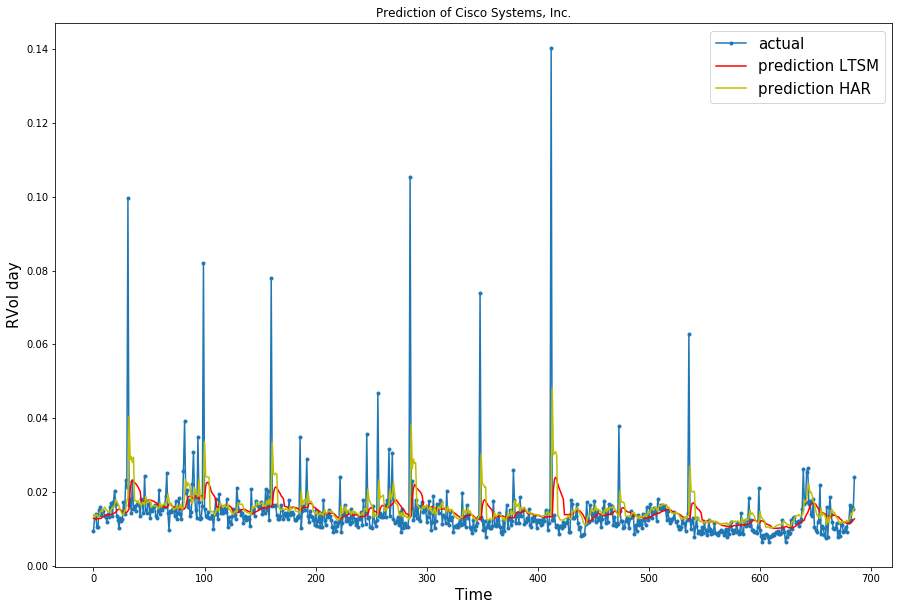

In [3]:
names=['AAPL.txt',GS.txt','EBAY.txt','CSCO.txt']
prev_per = [1,2,3,4,5,10]
FirstLayer = [5,15,25,50]
SecondLayer = [1,5,15,25]
n_epoch = [25]



for name in names:
    
    if name  == 'AAPL.txt':
        long_name = 'Apple Inc.'
        short_name = 'Apple'
    elif name  == 'PG.txt':
        long_name = 'The Procter & Gamble Company'
        short_name = 'PG'
    elif name  == 'CVX.txt':
        long_name = 'CVS Health Corporation'
        short_name = 'CVX'
    elif name  == 'GS.txt':
        long_name = 'The Goldman Sachs Group, Inc.'
        short_name = 'GS'
    elif name  == 'EBAY.txt':
        long_name = 'eBay Inc.'
        short_name = 'EBAY'
    elif name  == 'CSCO.txt':
        long_name = 'Cisco Systems, Inc.'
        short_name = 'CSCO'

    #Read the data
    all_data = pd.read_csv(name, sep=",",parse_dates={'dt' : ['Date', 'Time']},infer_datetime_format=True)
    #Select the columns
    all_data.index = all_data['dt'] 
    all_data = all_data[['Close']]
    #Add a new column. The log of the close price
    all_data['Log_Close']=np.log(all_data['Close'])
    #Substract the previous rows
    all_data['Returns']=all_data.Log_Close.diff()
    #Delete the first row
    all_data = all_data.iloc[1:]
    
    plt.figure()
    plt.plot(all_data['Returns'])
    plt.title('Returns of ' + long_name)
    plt.show()
    
    all_data['Returns^2']=np.square(all_data['Returns'])
    all_data_d=all_data.groupby(by=[all_data.index.year,all_data.index.month,all_data.index.day]).sum()
    data_RV=pd.DataFrame()
    data_RV['RVol_d']=np.sqrt(all_data_d['Returns^2'])
    data_RV = data_RV[['RVol_d']]
    data_RV.index.names=['Year','Month','Day']

    data_RV['RV_w']=data_RV['RVol_d'].rolling(min_periods=1, window=5).mean()
    data_RV['RV_m']=data_RV['RVol_d'].rolling(min_periods=1, window=22).mean()
    data_RV=data_RV.iloc[22:]

    data_RV['RVol_d+1']=data_RV.RVol_d.shift(-1)
    data_RV = data_RV.iloc[:-1]
    
    data_RV_1=data_RV   
    data_RV_1.index=pd.to_datetime(pd.DataFrame(data_RV_1.index.values.tolist(), columns=['year','month','day']))

     
    
    plt.figure(figsize = (15,10))
    plt.plot(data_RV_1['RVol_d'],label='_nolegend_')
    plt.ylabel('RVol day', size=15)
    plt.xlabel('Time', size=15)
    plt.legend(fontsize=15)
    plt.title('Realized Volatility of ' + long_name)
    plt.show()
    
    data=data_RV
    data=pd.DataFrame(data)
    data=data.values.reshape(data.shape[0],4)
    
    #Number of predicting periods
    forw_per = 1
    # Times to repeat the precition
    num_per = int(len(data_RV)*0.25)
    N_Per=[]
    NL1=[]
    NL2=[]
    N_Epochs=[]
    RMSE=[]
    MSE_VAR=[]
    Predictions=[]
    Elapsed=[]
    
    for prev in prev_per:
        div = len(data) - num_per*forw_per
        data_test = data[div-prev:]
        data_train=data[:div]

        x_test,y_test = DataProcessing(data_test,prev,forw_per,forw_per)
        y_test = np.array([list(a.ravel()) for a in y_test])

        x,y = DataProcessing(data_train,prev,forw_per)
        y = np.array([list(a.ravel()) for a in y])

        x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, test_size=0.2, shuffle=False)

        for L1 in FirstLayer:
            for L2 in SecondLayer:
                for epoch in n_epoch:
                    start = time.time()
                    model = Sequential()
                    model.add(LSTM(L1,input_shape=(prev,3), return_sequences=True))
                    model.add(LSTM(L2,input_shape=(L1,3)))
                    model.add(Dense(forw_per))
                    model.compile(loss='mean_squared_error', optimizer='adam')

                    history = model.fit(x_train,y_train, epochs=epoch, batch_size=100, 
                                        validation_data=(x_val, y_val))
                    end = time.time()
                    time_elapsed=end-start
                    y_pred = model.predict(x_test)
                    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                    mse_var=mean_squared_error(np.square(y_test), np.square(y_pred))
                    
                    
                    N_Per.append(prev)
                    NL1.append(L1)
                    NL2.append(L2)
                    N_Epochs.append(epoch)
                    Elapsed.append(time_elapsed)
                    RMSE.append(rmse)
                    MSE_VAR.append(mse_var)
                    Predictions.append(y_pred)
                    del history
                    del model
                    
                    
    
    Results=pd.DataFrame()
    Results['Previous Periods']=N_Per
    Results['Number Layers 1']=NL1
    Results['Number Layers 2']=NL2
    Results['Epochs']=N_Epochs
    Results['Time elapsed']=Elapsed
    Results['RMSE']=RMSE
    Results['MSE_VAR']=MSE_VAR
        
    csv_name= 'Results_'+short_name + ".csv"
    
    Results.to_csv(csv_name, sep=',',index=False)
    
    index_min_rmse = Results['RMSE'].argmin()
    opt_rmse=Results.iloc[index_min_rmse,5]
    opt_mse_var=Results.iloc[index_min_rmse,6]
    opt_y_pred=Predictions[index_min_rmse]
    
    #HAR MODEL

    x_HAR_train=data_RV.iloc[:-num_per,0:2]
    y_HAR_train=data_RV.iloc[:-num_per,3]
    x_HAR_test=data_RV.iloc[-num_per:,0:2]
    y_HAR_test=data_RV.iloc[-num_per:,3]
    
    HAR_model=LinearRegression()
    HAR_model.fit(x_HAR_train,y_HAR_train)
    y_HAR_pred = HAR_model.predict(x_HAR_test)
    rmse_HAR = np.sqrt(mean_squared_error(y_HAR_test, y_HAR_pred))
    mse_var_HAR=mean_squared_error(np.square(y_HAR_test), np.square(y_HAR_pred))
    print('Test RMSE LSTM ' + long_name+' :', opt_rmse)
    print('Test RMSE HAR ' + long_name+' :', rmse_HAR)
    print('Test MSE_VAR LSTM ' + long_name+' :', opt_mse_var)
    print('Test MSE_VAR HAR ' + long_name+' :', mse_var_HAR)
    
    plt.figure(figsize = (15,10))
    aa=[x for x in range(num_per)]
    plt.plot(aa, y_test[:num_per], marker='.', label="actual")
    plt.plot(aa, opt_y_pred[:num_per], 'r', label="prediction LTSM")
    plt.plot(aa, y_HAR_pred[:num_per], 'y', label="prediction HAR")
    plt.ylabel('RVol day', size=15)
    plt.xlabel('Time', size=15)
    plt.legend(fontsize=15)
    plt.title('Prediction of ' + long_name)
    plt.show()
